# Знакомство с библиотекой `sklearn`. Линейная (и не очень) регрессия.

Библиотека `sklearn` является одной из самых популярных библиотек для машинного обучения, так как предлагает широкий спектр инструментов, позволяющий решать необходимые для специалиста задачи

Чем выделяется библиотека `sklearn`:
* **Простота использования**. Библиотека имеет простой и интуитивно понятный интерфейс для реализации моделей машинного обучения.
* **Разнообразие алгоритмов**. `sklearn` предлагает широкий выбор алгоритмов ML, с частью из которых вы уже знакомы по предыдущим урокам (линейная регрессия, дерево решений и т.д.).
* **Предобработка данных**. `sklearn` имеет модуль `preprocessing`, который позволяет масштабировать, кодировать категориальные переменные, извлекать признаки и многое другое.
* **Подбор параметров**. В библиотеке реализованы инструменты, позволяющие выбирать оптимальные гиперпараметры для модели машинного обучения.
* **Метрики и оценка моделей**. В `sklearn` имеется модуль `metrics`, в котором присутствуют разнообразные метрики для оценки моделей машинного обучение. Также имееются встроенные методы проверки и оценки моделей.

In [ ]:
#pip install scikit-learn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

Загрузим тренировочный датасет из библиотеки `sklearn`

In [2]:
df = load_iris(as_frame=True).frame
iris = load_iris() # Можно и так

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [4]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [6]:
print(iris.target_names) # Имена классов (первому имени соотв. метка 0, второму 1, ...)

['setosa' 'versicolor' 'virginica']


Сделаем статистический срез по классам:

In [8]:
for i in df['target'].unique():
    print(f'==Class {i}==')
    display(df.query(f'target == {i}').describe().loc[['min', 'mean', 'max'], :])

==Class 0==


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
min,4.300,2.300,1.000,0.100,0.0
mean,5.006,3.428,1.462,0.246,0.0
max,5.800,4.400,1.900,0.600,0.0


==Class 1==


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
min,4.900,2.00,3.00,1.000,1.0
mean,5.936,2.77,4.26,1.326,1.0
max,7.000,3.40,5.10,1.800,1.0


==Class 2==


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
min,4.900,2.200,4.500,1.400,2.0
mean,6.588,2.974,5.552,2.026,2.0
max,7.900,3.800,6.900,2.500,2.0


Данные 4х-мерные, поэтому мы можем визуализировать только часть измерений.
Раскрасим точки в зависимости от класса в красный, зеленый и синий. 
Отобразим все уникальные комбинации из двух атрибутов. Всего их $\frac{M(M-1)}{2} = 6$

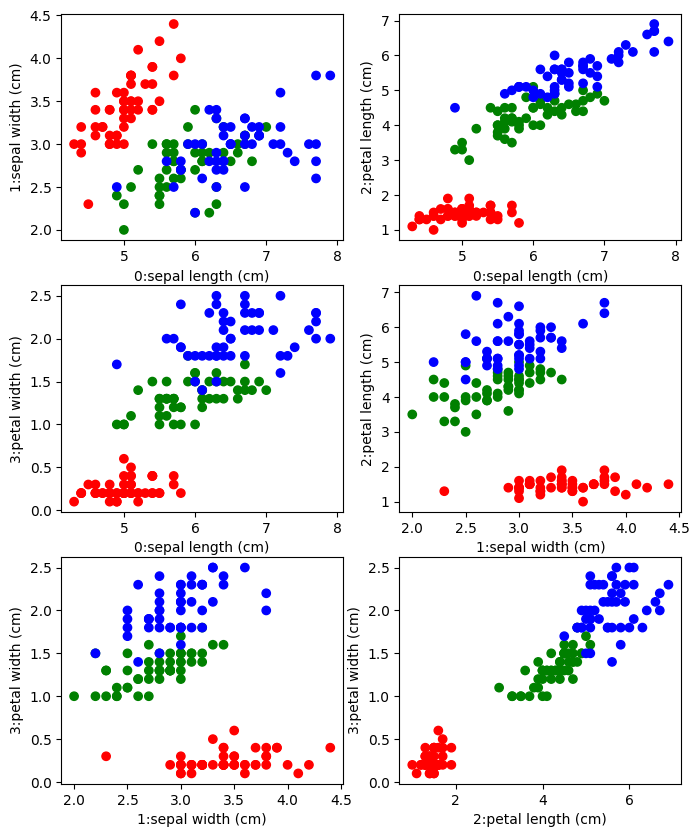

In [9]:
from matplotlib.colors import ListedColormap
X = iris.data
y = iris.target
cmap = ListedColormap(['red', 'green', 'blue'])

fig = plt.figure(figsize=(8, 10))
k = 1
for i in range(4):
    for j in range(i+1,4):
        attr1_name = str(i) + ':' + iris.feature_names[i]
        attr2_name = str(j) + ':' + iris.feature_names[j]
        ax = fig.add_subplot(3,2,k)
        ax.scatter(X[:,i],X[:,j], cmap=cmap, c=y)
        ax.set_xlabel(attr1_name)
        ax.set_ylabel(attr2_name)
        k += 1

plt.show()

#  Валидация данных

Метод `train_test_split` позволяет случайным образом разделить исходный набор данных на две подвыборки:
* **Обучающая выборка**. Используется для обучения модели. Она содержит примеры данных, на которых модель будет "учиться".
* **Тестовая выборка**. используется для оценки обобщающей способности модели. Она содержит примеры данных, которые модель не видела во время обучения, и используется для измерения качества предсказания.

Помимо обучающей и тестовой выборок, `train_test_split` также может разделить данные на валидационную выборку (validation set). Валидационная выборка используется для настройки гиперпараметров и определения наилучших параметров модели.

У `train_test_split` есть несколько основных параметров:
* `X` — представляет собой набор признаков
* `y` — целевая переменная
* `test_size` — указывается доля данных, которая будет выделена под тестовую выборку
* `random_state` — позволяет зафиксировать элемент случайности, то есть гарантирует, что при каждом перезапуска ячейки, данные будут делиться одинаково каждый раз 

Пример синтаксиса:

`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)`

На данном этапе происходит отделение обычных признаков от целевой переменной

In [10]:
features = df.drop(['target'], axis=1)
target = df['target']

print(features.shape)
print(target.shape)

(150, 4)
(150,)


In [11]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2, random_state=42)

In [12]:
features_train.value_counts(normalize = True).sort_index()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
4.3                3.0               1.1                0.1                 0.008333
4.4                2.9               1.4                0.2                 0.008333
                   3.0               1.3                0.2                 0.008333
                   3.2               1.3                0.2                 0.008333
4.5                2.3               1.3                0.3                 0.008333
                                                                              ...   
7.4                2.8               6.1                1.9                 0.008333
7.6                3.0               6.6                2.1                 0.008333
7.7                2.8               6.7                2.0                 0.008333
                   3.0               6.1                2.3                 0.008333
                   3.8               6.7                2.2                 0

In [13]:
features_test.value_counts(normalize = True).sort_index()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
4.7                3.2               1.6                0.2                 0.033333
4.8                3.0               1.4                0.1                 0.033333
                                                        0.3                 0.033333
                   3.1               1.6                0.2                 0.033333
4.9                3.1               1.5                0.1                 0.033333
5.0                3.4               1.6                0.4                 0.033333
5.1                3.8               1.5                0.3                 0.033333
5.4                3.4               1.5                0.4                 0.033333
5.5                3.5               1.3                0.2                 0.033333
5.6                2.5               3.9                1.1                 0.033333
                   2.9               3.6                1.3                 0

# Обучение моделей

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [18]:
model = DecisionTreeClassifier()
model.fit(features_train, target_train)
#fit(x_train,y_train)
print(model)

DecisionTreeClassifier()


In [19]:
pred = model.predict(features_test)

In [34]:
pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

[Text(0.3076923076923077, 0.9285714285714286, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'petal width (cm) <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'petal width (cm) <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'petal length (cm) <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077

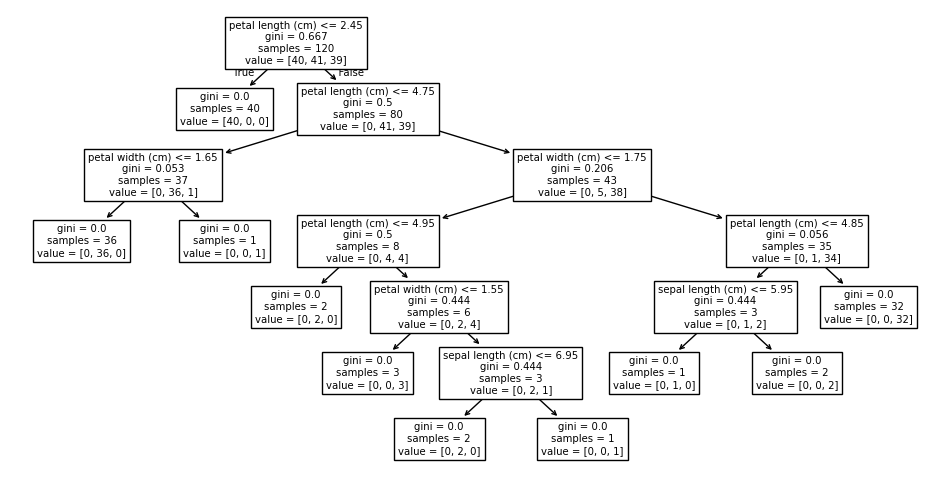

In [21]:
plt.figure(figsize=(12,6))
plot_tree(model, feature_names = features_train.columns)

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [23]:
mall_df = pd.read_csv('Mall_Customers.csv')

In [25]:
mall_df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [26]:
mall_df['Genre'] = mall_df['Genre'].apply(lambda x: 1 if (x == 'Male') else 0)

In [28]:
mall_df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [29]:
features = mall_df.drop(['Spending Score (1-100)', 'CustomerID'], axis=1)
target = mall_df['Spending Score (1-100)']

print(features.shape)
print(target.shape)

(200, 3)
(200,)


## Решающее дерево

In [30]:
dtr = DecisionTreeRegressor()

In [31]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

In [32]:
dtr.fit(features_train, target_train)

DecisionTreeRegressor()

In [33]:
pred_dtr = dtr.predict(features_test)

In [36]:
rmse_dtr = mean_squared_error(target_test, pred_dtr) ** 0.5
print(rmse_dtr)

27.991516571990164


In [35]:
pred_dtr

array([41., 76.,  3., 90.,  5., 46., 42., 91., 36., 92., 42., 16., 72.,
       55., 35., 88., 45., 16., 47., 55., 12., 99., 95., 42., 41., 55.,
       55., 52., 71., 12., 99.,  4., 42., 55., 35., 48., 40., 93., 36.,
       44.])

## Метрики линейной регрессии

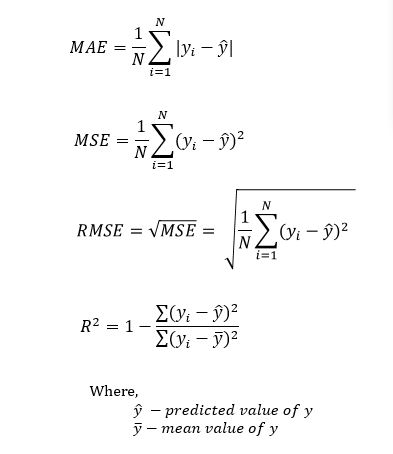

<b>MAE</b> - Mean Absolute Error - средне-абсолютная ошибка  
<b>MSE</b> - Mean Squared Error, средне-квадратичная ошибка  
<b>RMSE</b> - Root Mean Squared Error - корень из MSE  
<b>R2</b> - коэффициент детерминации

<i>Осторожно, шакалы</i>
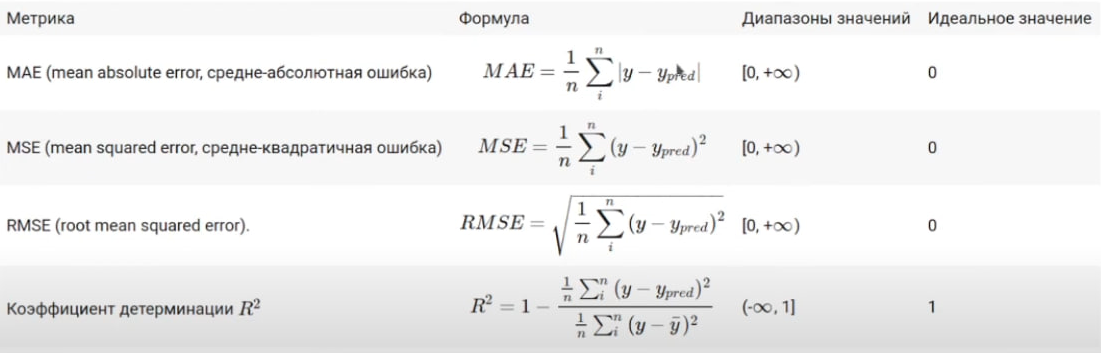

## Линейная регрессия

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(features_train, target_train)

LinearRegression()

In [40]:
pred_lr = lr.predict(features_test)
pred_lr_train = lr.predict(features_train)

In [42]:
rmse_lr = mean_squared_error(target_test, pred_lr) ** 0.5
rmse_lr_train = mean_squared_error(target_train, pred_lr_train) ** 0.5
print(rmse_lr)
print(rmse_lr_train)

21.924259205438346
24.98947672199019


## Случайный лес

In [43]:
rfr = RandomForestRegressor()

In [44]:
rfr.fit(features_train, target_train)

RandomForestRegressor()

In [48]:
pred_rfr = rfr.predict(features_test)
pred_rfr_train = rfr.predict(features_train)

In [49]:
rmse_rfr = mean_squared_error(target_test, pred_rfr) ** 0.5
rmse_rfr_train = mean_squared_error(target_train, pred_rfr_train) ** 0.5

print(rmse_rfr)
print(rmse_rfr_train)

20.63243846210043
9.48748201944845


## Пример современного бустинга

In [10]:
#pip install catboost

  Using cached catboost-1.2.7-cp312-cp312-win_amd64.whl.metadata (1.2 kB)
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
Using cached catboost-1.2.7-cp312-cp312-win_amd64.whl (101.7 MB)
Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)
Note: you may need to restart the kernel to use updated packages.


In [14]:
from catboost import CatBoostRegressor

In [51]:
cbr = CatBoostRegressor()

In [52]:
cbr.fit(features_train, target_train)

Learning rate set to 0.03065
0:	learn: 26.1987960	total: 130ms	remaining: 2m 10s
1:	learn: 26.0727320	total: 131ms	remaining: 1m 5s
2:	learn: 25.9039459	total: 131ms	remaining: 43.5s
3:	learn: 25.7651372	total: 131ms	remaining: 32.7s
4:	learn: 25.5057503	total: 132ms	remaining: 26.2s
5:	learn: 25.3597269	total: 132ms	remaining: 21.9s
6:	learn: 25.1718450	total: 133ms	remaining: 18.8s
7:	learn: 25.0692915	total: 133ms	remaining: 16.5s
8:	learn: 24.9313165	total: 134ms	remaining: 14.7s
9:	learn: 24.7597324	total: 134ms	remaining: 13.3s
10:	learn: 24.6618357	total: 134ms	remaining: 12.1s
11:	learn: 24.5522304	total: 135ms	remaining: 11.1s
12:	learn: 24.4327013	total: 135ms	remaining: 10.2s
13:	learn: 24.3046930	total: 135ms	remaining: 9.52s
14:	learn: 24.2089767	total: 136ms	remaining: 8.9s
15:	learn: 24.0062637	total: 136ms	remaining: 8.36s
16:	learn: 23.8277016	total: 136ms	remaining: 7.88s
17:	learn: 23.6396528	total: 137ms	remaining: 7.45s
18:	learn: 23.4684483	total: 137ms	remaining:

In [56]:
pred_cbr = cbr.predict(features_test)
pred_cbr_train = cbr.predict(features_train)

In [59]:
rmse_cbr = mean_squared_error(target_test, pred_cbr) ** 0.5
rmse_cbr_train = mean_squared_error(target_train, pred_cbr_train) ** 0.5
print(rmse_cbr)
print(rmse_cbr_train)

21.98687028829406
6.923884796042924


## Улучшение качества моделей и метрик

### Переобучение и недообучение

In [60]:
model = DecisionTreeRegressor(min_samples_leaf=1, random_state=42)
model.fit(features_train, target_train)

DecisionTreeRegressor(random_state=42)

In [61]:
pred_dtr_train = model.predict(features_train)
pred_dtr_test = model.predict(features_test)

print(mean_squared_error(pred_dtr_train, target_train) ** 0.5)
print(mean_squared_error(pred_dtr_test, target_test) ** 0.5)

4.6090942711122755
27.67489837379715


In [62]:
model.get_depth()

15

In [66]:
model = DecisionTreeRegressor(max_depth = 5, random_state=42)
model.fit(features_train, target_train)
pred_dtr_train = model.predict(features_train)
pred_dtr_test = model.predict(features_test)

print(mean_squared_error(pred_dtr_train, target_train) ** 0.5)
print(mean_squared_error(pred_dtr_test, target_test) ** 0.5)

16.081812601986375
18.220022514274124


In [67]:
model.get_depth()

5

### Визуализация влияния признаков

In [68]:
from sklearn.inspection import permutation_importance
import numpy as np

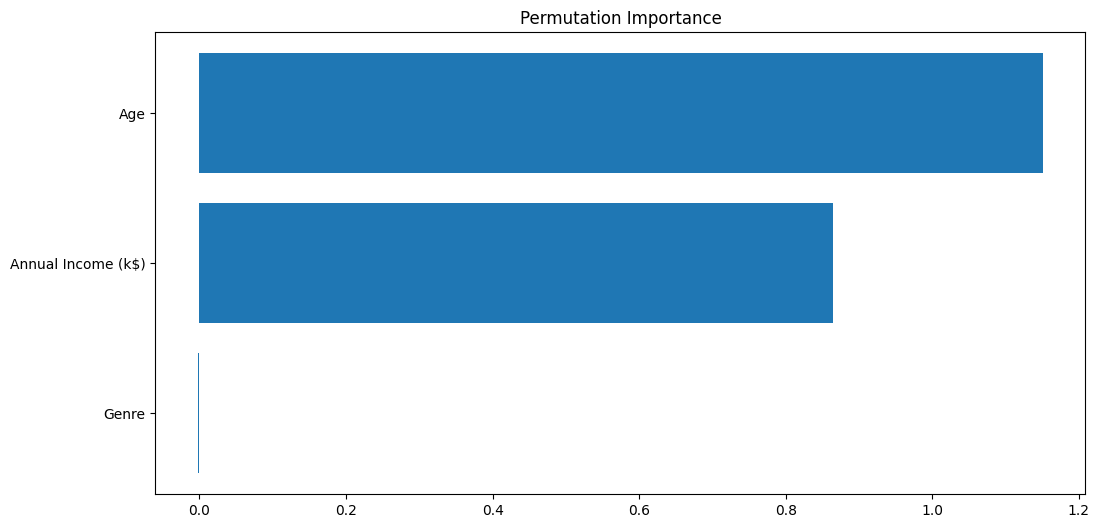

In [69]:
perm_importance = permutation_importance(model, features_test, target_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(features.columns)[sorted_idx])
plt.title('Permutation Importance');

In [71]:
mall_df.corr()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Genre,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000


<Axes: >

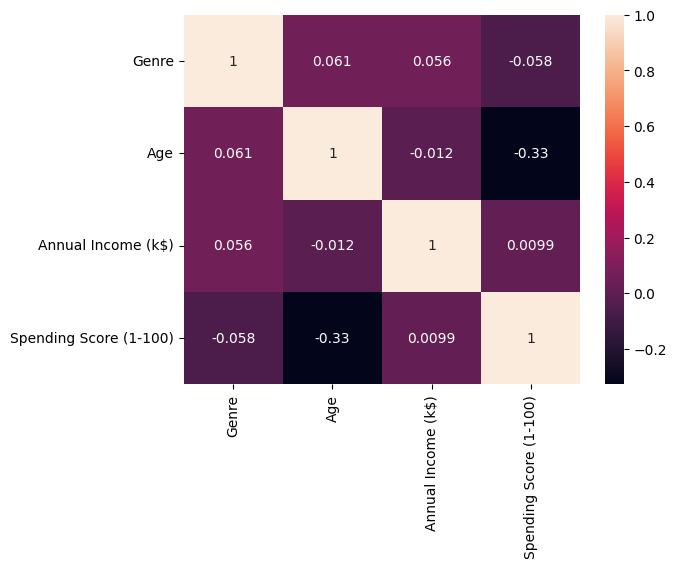

In [74]:
#pip install seaborn
import seaborn as sns
sns.heatmap(data=mall_df.corr(), annot=True) 

In [73]:
mall_df.drop(['CustomerID'],axis = 1, inplace=True)

### Кросс-валидация

Проверить качество модели на одной только тестовой выборке не всегда достаточно. Как убедиться в точности результатов?

Вы уже умеете делить данные на обучающую и валидационную выборки. Знаете, что репрезентативность достигается за счёт случайного отбора.

Но как гарантировать корректность распределения на большом наборе данных? Нужно взять **несколько случайных выборок!**

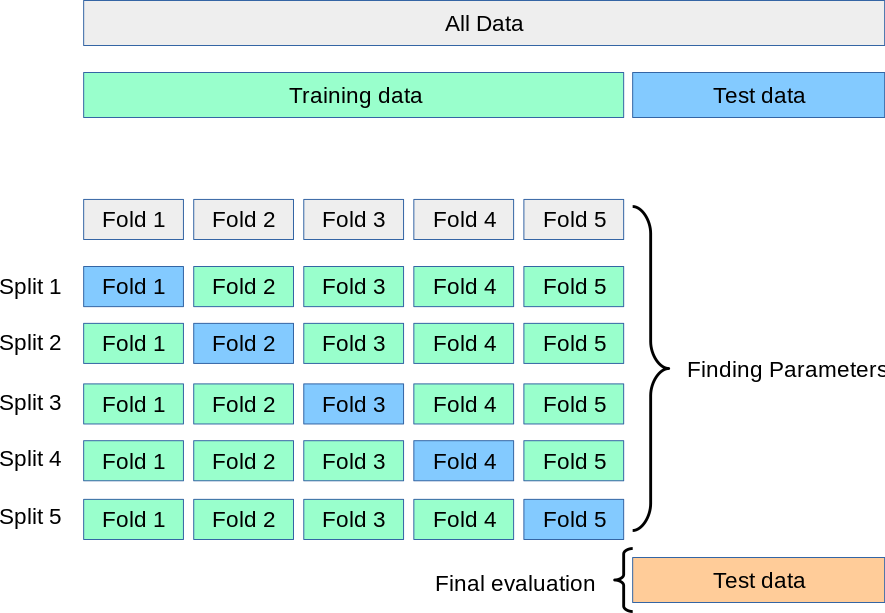

In [75]:
from sklearn.model_selection import cross_validate

In [76]:
lnr = LinearRegression()

lnr.fit(features_train, target_train)


scores = cross_validate(lnr, features_train,target_train, cv = 3,
                        scoring = ('neg_mean_squared_error'), # Решается задача минимизации
                        return_train_score = True)


print('Время обучения модели: %.2f секунд' %scores['fit_time'].mean(),
      '\nRMSE на кросс-валидации:', (-scores['train_score'].mean())**0.5)

Время обучения модели: 0.00 секунд 
RMSE на кросс-валидации: 24.86770221441412


Единственный недостаток кросс-валидации — время на вычисления, особенно при большом количестве наблюдений или блоков. Много времени.

 ### Масштабирование данных

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [80]:
mall_df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


`StandardScaler()` — это метод предварительной обработки данных, который используется в машинном обучении для масштабирования и стандартизации признаков. Он преобразует каждый признак путем центрирования вокруг среднего значения и масштабирования до единичной дисперсии. 

In [81]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train_sc = scaler.transform(features_train)
features_test_sc = scaler.transform(features_test)

In [82]:
pd.DataFrame(features_train_sc, columns=features_train.columns).head()

,Genre,Age,Annual Income (k$)
0,-0.870771,0.730279,-0.241904
1,1.148408,-0.500427,2.394554
2,-0.870771,-0.210849,-0.864401
3,-0.870771,1.092251,-1.193959
4,-0.870771,0.078729,0.307358


In [83]:
model = DecisionTreeRegressor(max_depth = 5)
model.fit(features_train_sc, target_train)

pred_dtr_train = model.predict(features_train_sc)
pred_dtr_test = model.predict(features_test_sc)

print(mean_squared_error(pred_dtr_train, target_train) ** 0.5)
print(mean_squared_error(pred_dtr_test, target_test) ** 0.5)

16.081812601986375
18.220022514274124


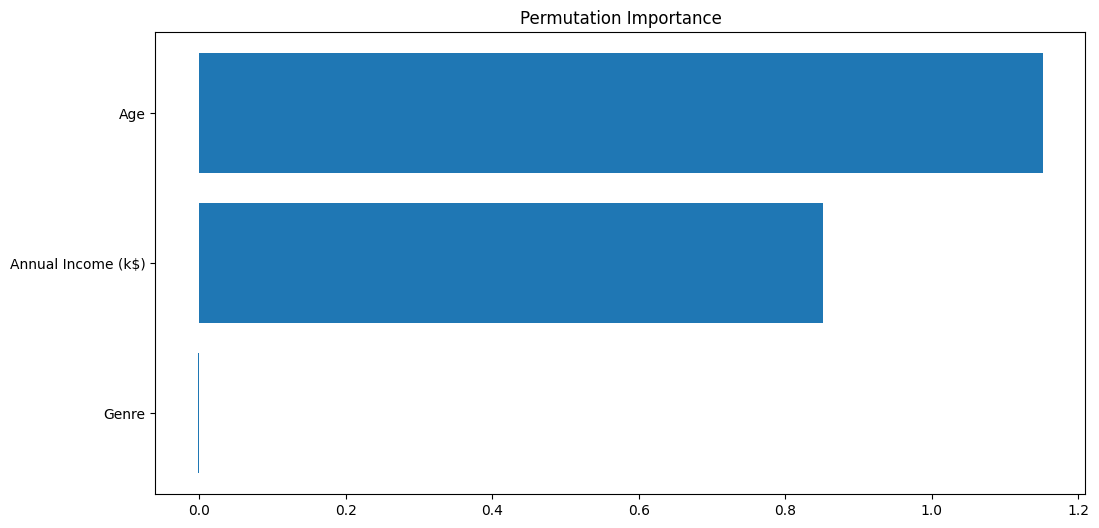

In [84]:
perm_importance = permutation_importance(model, features_test_sc, target_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(features.columns)[sorted_idx])
plt.title('Permutation Importance');

`MinMaxScaler()` — это метод предварительной обработки данных, используемый в области машинного обучения для масштабирования и приведения признаков к определенному диапазону значений. Он масштабирует каждый признак таким образом, чтобы значения находились в определенном диапазоне, часто от 0 до 1

In [85]:
scaler = MinMaxScaler()
scaler.fit(features_train)
features_train_minmax = scaler.transform(features_train)
features_test_minmax = scaler.transform(features_test)

In [86]:
pd.DataFrame(features_train_minmax, columns=features_train.columns).head()

,Genre,Age,Annual Income (k$)
0,0.0,0.596154,0.319672
1,1.0,0.269231,0.909836
2,0.0,0.346154,0.180328
3,0.0,0.692308,0.106557
4,0.0,0.423077,0.442623


In [89]:
model = DecisionTreeRegressor(max_depth=5)
model.fit(features_train_minmax, target_train)

pred_dtr_train = model.predict(features_train_minmax)
pred_dtr_test = model.predict(features_test_minmax)

print(mean_squared_error(pred_dtr_train, target_train) ** 0.5)
print(mean_squared_error(pred_dtr_test, target_test) ** 0.5)

16.081812601986375
18.236309122754417


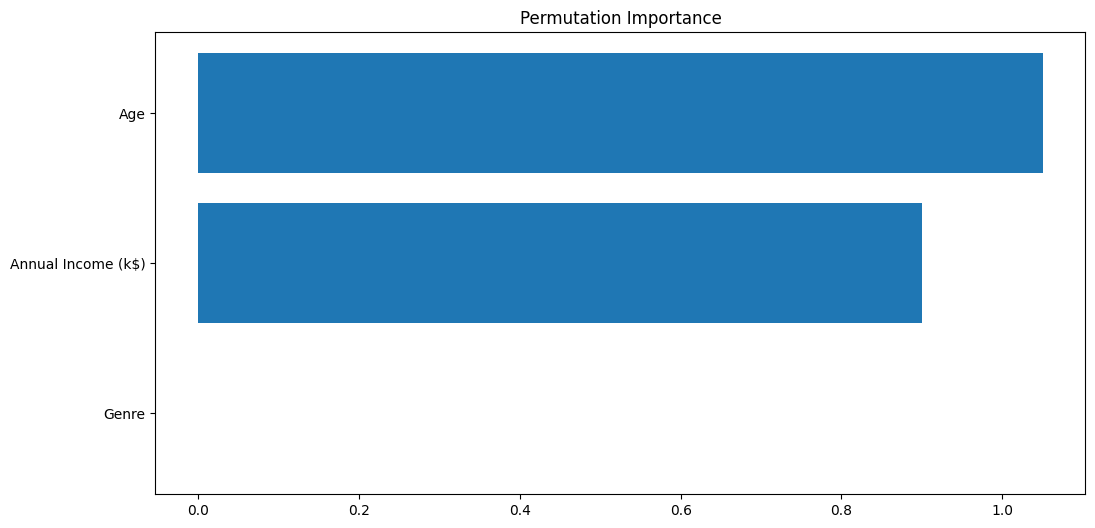

In [88]:
perm_importance = permutation_importance(model, features_test_minmax, target_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(features.columns)[sorted_idx])
plt.title('Permutation Importance');

### Кодирование данных

In [90]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

`OrdinalEncoder()` — это метод предварительной обработки данных, используемый в области машинного обучения для кодирования категориальных (номинальных или порядковых) признаков в числовые значения. Он присваивает каждому уникальному значению категориального признака уникальный целочисленный код.

In [91]:
encoder = OrdinalEncoder()

# Производим кодирование данных
encoded_data = encoder.fit_transform(features_train)

In [92]:
pd.DataFrame(encoded_data, columns=features_train.columns).head()

,Genre,Age,Annual Income (k$)
0,0.0,31.0,27.0
1,1.0,14.0,60.0
2,0.0,18.0,15.0
3,0.0,35.0,10.0
4,0.0,22.0,38.0


`OneHotEncoder()` — это метод предварительной обработки данных, используемый в машинном обучении для кодирования категориальных (номинальных) признаков в виде бинарных (дамми) переменных. Он преобразует каждую категорию признака в новый бинарный признак, который указывает на принадлежность категории.

In [93]:
encoder = OneHotEncoder()

# Производим кодирование данных
encoded_data = encoder.fit_transform(features_train).toarray()
column_names = encoder.get_feature_names_out()
pd.DataFrame(encoded_data, columns=column_names).head()

,Genre_0,Genre_1,Age_18,Age_19,Age_20,Age_21,Age_22,Age_23,Age_24,Age_25,...,Annual Income (k$)_93,Annual Income (k$)_97,Annual Income (k$)_98,Annual Income (k$)_99,Annual Income (k$)_101,Annual Income (k$)_103,Annual Income (k$)_113,Annual Income (k$)_120,Annual Income (k$)_126,Annual Income (k$)_137
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Гиперпараметры

Количество узлов и их взаимное расположение (структура), вопрос
в вершине и ответы в нижних узлах. Всё это параметры, которые модель узнаёт из обучающих данных (только не путайте параметры в Python
и машинном обучении).

Помимо обычных параметров есть ещё гиперпараметры, настройки алгоритмов обучения. В решающем дереве, например, это максимальная глубина.

Гиперпараметры помогают улучшить качество модели. Изменить их можно до начала обучения.

In [ ]:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, random_state=None,
            splitter='best') 

`criterion` — критерий прироста информации, по которому подбирается очередное решающее правило. Мы уже знакомы с энтропией, мерой хаоса
в данных. А вот ‘gini' (Джини) показывает меру сходства двух наборов данных. Обучаясь, дерево в каждом узле (на каждой развилке) из возможных вопросов задаёт наилучший. Сейчас оно выбирает тот вопрос, для которого критерий Джини показывает, что отнесённые к левой ветке данные меньше всего похожи на данные в правой ветке. Более подробно о критериях классификации и регрессии можно почитать в документации.

`min_samples_split` — минимальное количество примеров для разделения. Этот гиперпараметр запрещает создавать узлы, в которые попадает слишком мало объектов обучающей выборки.

`min_samples_leaf` — минимальное количество объектов в листе. Листья —
это нижние узлы с ответами. А гиперпараметр не разрешает создавать лист,
в котором слишком мало объектов обучающей выборки.

Значения гиперпараметров установлены по умолчанию, вы можете их не прописывать или, наоборот, поменять все.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, 
                       min_samples_split=2, min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, max_features='sqrt', 
                       max_leaf_nodes=None, min_impurity_decrease=0.0, 
                       bootstrap=True, oob_score=False, n_jobs=None, 
                       random_state=None, verbose=0, warm_start=False, 
                       class_weight=None, ccp_alpha=0.0, max_samples=None)

Обратим внимание на следующие новые гиперпараметры:

`n_estimators` — количество деревьев в случайном лесу. Чем больше деревьев, тем дольше модель будет учиться, но результат станет лучше
(и наоборот).  
`bootstrap` — отвечает за то, обучать ли очередное дерево на подвыборке из обучающей выборки **(True)** или же использовать обучающую выборку целиком **(False)**.
Хотя увеличение количества деревьев кажется усложнением модели, на деле оно позволяет лишь улучшать качество модели, в том числе и на валидационной выборке.

Решающие деревья склонны к переобучению, а усреднение предсказаний решающих деревьев, построенных на различных подвыборках обучающей части данных, позволяет усреднить смещения и получить более высокое качество.